**Nome:** Thatielen Oliveira Pereira <br>
**Matrícula:** 1515080618

## IMPORTAÇÃO DE BIBLIOTECAS

In [7]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import os

In [8]:
np.set_printoptions(precision=4)

## FUNÇÕES AUXILIARES

In [9]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores

def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria = np.array([]), np.array([])
    tam = len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    return (entrada_aleatoria, saida_aleatoria)

def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

## PERCEPTRON RANDOMIZADO

In [10]:
def funcao_ativacao(soma, teta):
    if (soma >= teta):
        return 1
    return 0

# Função que realiza o produto escalar de um regitro com os pesos
def calculo_saida(registro, pesos, teta):
    soma = registro.dot(pesos)
    return funcao_ativacao(soma, teta)

# Função de treinamento que é executada até que não haja erro
def treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta, max_it):
    # Aleatorização das entradas
    entradas, saidas = aleatoriza(entradas, saidas)
    # Inicialização de variáveis
    epocas = 1
    ajustes_por_epoca = []
    saidas_treinamento = np.array([], dtype=int)
    # Exibição inicial dos pesos
    print("Peso:", pesos)

    # Verficando condição inicial para iniciar o loop de treinamento 
    
    # Loop que garante a execução até que não haja erro
    while (np.array_equal(saidas, saidas_treinamento) == False and epocas < max_it):
        ajustes_pesos = 0
        saidas_treinamento = np.array([], dtype=int)
        # Loop para percorrer todas as entradas/saídas
        for i in range(0, len(entradas), 1):
            alterou_pesos = False
            # Cálculo da saída para a entrada atual aplicando-se os pesos
            saida_calculada = calculo_saida(np.asarray(entradas[i]), pesos, teta)
            # Cálculo do erro da saída
            erro = saidas[i] - saida_calculada
            # Salvamento da saída
            saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
            # Loop para atualização do vetor de pesos
            for j in range(0, len(pesos), 1):
                # Cálculo do novo peso
                aux = pesos[j] + (taxa_aprendizagem * entradas[i][j] * erro)
                # Contagem de ajustes dos pesos da época caso haja mudança de valor
                if(aux != pesos[j]):
                    ajustes_pesos += 1
                    alterou_pesos = True
                pesos[j] = aux
            # Exibe os pesos casa haja alteração
            if(alterou_pesos == True):
                print("Pesos: ", pesos)
        # Exibe o número de ajustes de pesos da época
        print("%d ajustes no vetor de pesos na época %d" %(ajustes_pesos, epocas))
        # Guarda o total de ajustes por época
        ajustes_por_epoca.append(ajustes_pesos)
        epocas += 1

    return pesos, epocas, ajustes_por_epoca, saidas_treinamento

## LEITURA DO DATASET

In [11]:
# Leitura do arquivo dataHoldout.txt
data = np.fromfile(os.path.join(os.path.join('..', 'datasets'), 'dataHoldout.txt'), dtype=float)
print(data.shape)

(2400,)


## TRATAMENTO DO DATASET

In [12]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(800, 3)



In [13]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(800,)


In [14]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(800, 3)


### Primeiro gráfico: mostrando que o problema não é linearmente separável

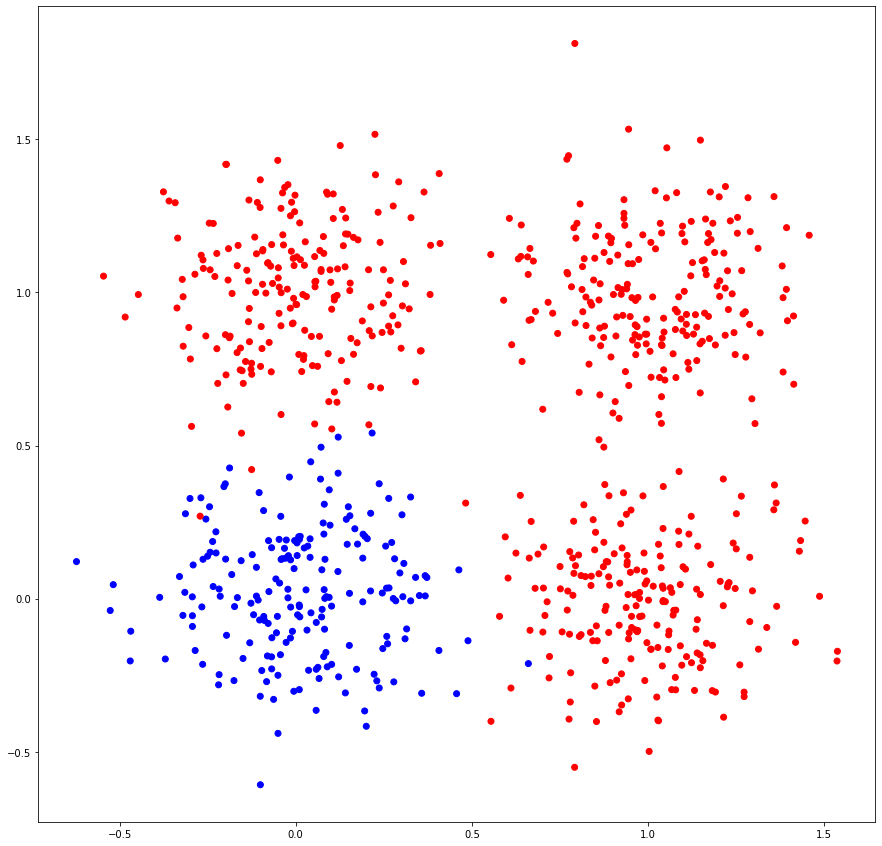

In [15]:
# Criando a lista de cores
cores = criar_cores(saidas)

# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.show()

Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.  

## Separação de Dados

In [16]:
entrada_aleatoria, saida_aleatoria = aleatoriza(entradas, saidas)

**Holdout 70 / 30**

In [17]:
lim = int(len(entrada_aleatoria) * 0.7)
x_treino, y_treino = entrada_aleatoria[:lim], saida_aleatoria[:lim]
x_teste, y_teste = entrada_aleatoria[lim:], saida_aleatoria[lim:]

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


## APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [18]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[-0.3225  0.1255 -0.1025]


In [19]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(x_treino, y_treino, pesos, taxa_aprendizagem, teta, 100)

Peso: [-0.3225  0.1255 -0.1025]
Pesos:  [-0.2225  0.0341 -0.2041]
Pesos:  [-0.1225 -0.0322 -0.295 ]
Pesos:  [-0.0225 -0.1408 -0.3171]
Pesos:  [-0.1225 -0.144  -0.3006]
Pesos:  [-0.0225 -0.2218 -0.289 ]
Pesos:  [-0.1225 -0.2097 -0.248 ]
Pesos:  [-0.0225 -0.2946 -0.2195]
Pesos:  [-0.1225 -0.2606 -0.2125]
Pesos:  [-0.0225 -0.2303 -0.3011]
Pesos:  [-0.1225 -0.1999 -0.3004]
Pesos:  [-0.2225 -0.1878 -0.2477]
Pesos:  [-0.1225 -0.2732 -0.2075]
Pesos:  [-0.0225 -0.2589 -0.285 ]
Pesos:  [-0.1225 -0.2238 -0.284 ]
Pesos:  [-0.0225 -0.3268 -0.2441]
Pesos:  [-0.1225 -0.3065 -0.2245]
Pesos:  [-0.0225 -0.2746 -0.307 ]
Pesos:  [-0.1225 -0.2626 -0.2981]
Pesos:  [-0.2225 -0.2556 -0.259 ]
Pesos:  [-0.1225 -0.3307 -0.2622]
Pesos:  [-0.2225 -0.3157 -0.2322]
Pesos:  [-0.1225 -0.376  -0.239 ]
Pesos:  [-0.0225 -0.3276 -0.3309]
Pesos:  [-0.1225 -0.3011 -0.3274]
Pesos:  [-0.2225 -0.3029 -0.2877]
Pesos:  [-0.1225 -0.2904 -0.3298]
Pesos:  [-0.2225 -0.2707 -0.3095]
Pesos:  [-0.1225 -0.2162 -0.4148]
Pesos:  [-0.2225

Pesos:  [-0.3225 -0.5284 -0.4466]
Pesos:  [-0.2225 -0.4962 -0.5508]
Pesos:  [-0.3225 -0.4812 -0.5208]
Pesos:  [-0.2225 -0.4328 -0.6128]
Pesos:  [-0.3225 -0.4346 -0.5731]
Pesos:  [-0.2225 -0.4221 -0.6152]
Pesos:  [-0.3225 -0.3919 -0.5878]
Pesos:  [-0.2225 -0.4873 -0.5784]
Pesos:  [-0.3225 -0.4547 -0.5452]
Pesos:  [-0.4225 -0.433  -0.4911]
Pesos:  [-0.3225 -0.5294 -0.4809]
Pesos:  [-0.2225 -0.4975 -0.5795]
Pesos:  [-0.3225 -0.4711 -0.5468]
Pesos:  [-0.2225 -0.4562 -0.6171]
Pesos:  [-0.1225 -0.5487 -0.5824]
Pesos:  [-0.0225 -0.5215 -0.6093]
69 ajustes no vetor de pesos na época 14
Pesos:  [-0.1225 -0.5247 -0.5929]
Pesos:  [-0.2225 -0.5127 -0.5519]
Pesos:  [-0.3225 -0.4915 -0.524 ]
Pesos:  [-0.2225 -0.4611 -0.6125]
Pesos:  [-0.3225 -0.4491 -0.5598]
Pesos:  [-0.2225 -0.5344 -0.5197]
Pesos:  [-0.1225 -0.612  -0.4803]
Pesos:  [-0.2225 -0.5769 -0.4793]
Pesos:  [-0.1225 -0.5449 -0.5618]
Pesos:  [-0.2225 -0.5379 -0.5227]
Pesos:  [-0.3225 -0.5124 -0.5055]
Pesos:  [-0.2225 -0.5825 -0.4946]
Pesos: 

Pesos:  [-0.2225 -0.4506 -0.5863]
Pesos:  [-0.3225 -0.4385 -0.5335]
Pesos:  [-0.2225 -0.5239 -0.4934]
Pesos:  [-0.1225 -0.6015 -0.4541]
Pesos:  [-0.2225 -0.5664 -0.4531]
Pesos:  [-0.1225 -0.5344 -0.5355]
Pesos:  [-0.2225 -0.5274 -0.4965]
Pesos:  [-0.3225 -0.5125 -0.4665]
Pesos:  [-0.2225 -0.4641 -0.5584]
Pesos:  [-0.1225 -0.4515 -0.6006]
Pesos:  [-0.2225 -0.4319 -0.5802]
Pesos:  [-0.3225 -0.4017 -0.5528]
Pesos:  [-0.4225 -0.3801 -0.4988]
Pesos:  [-0.3225 -0.4765 -0.4886]
Pesos:  [-0.2225 -0.4638 -0.5635]
Pesos:  [-0.3225 -0.4566 -0.5141]
Pesos:  [-0.2225 -0.4417 -0.5844]
Pesos:  [-0.1225 -0.5342 -0.5497]
Pesos:  [-0.0225 -0.5071 -0.5766]
66 ajustes no vetor de pesos na época 30
Pesos:  [-0.1225 -0.5103 -0.5602]
Pesos:  [-0.2225 -0.4983 -0.5192]
Pesos:  [-0.3225 -0.477  -0.4913]
Pesos:  [-0.2225 -0.4467 -0.5798]
Pesos:  [-0.3225 -0.4346 -0.5271]
Pesos:  [-0.2225 -0.52   -0.487 ]
Pesos:  [-0.1225 -0.5975 -0.4476]
Pesos:  [-0.2225 -0.5625 -0.4466]
Pesos:  [-0.1225 -0.5305 -0.5291]
Pesos: 

Pesos:  [-0.1225 -0.5304 -0.525 ]
Pesos:  [-0.2225 -0.5234 -0.4859]
Pesos:  [-0.3225 -0.5084 -0.4559]
Pesos:  [-0.2225 -0.46   -0.5479]
Pesos:  [-0.1225 -0.4475 -0.59  ]
Pesos:  [-0.2225 -0.4278 -0.5697]
Pesos:  [-0.3225 -0.3977 -0.5423]
Pesos:  [-0.2225 -0.4749 -0.5448]
Pesos:  [-0.3225 -0.4423 -0.5116]
Pesos:  [-0.4225 -0.4206 -0.4575]
Pesos:  [-0.3225 -0.5171 -0.4473]
Pesos:  [-0.2225 -0.4851 -0.5459]
Pesos:  [-0.3225 -0.4587 -0.5132]
Pesos:  [-0.2225 -0.4438 -0.5835]
Pesos:  [-0.1225 -0.5363 -0.5487]
Pesos:  [-0.0225 -0.5092 -0.5757]
72 ajustes no vetor de pesos na época 45
Pesos:  [-0.1225 -0.5124 -0.5592]
Pesos:  [-0.2225 -0.5003 -0.5183]
Pesos:  [-0.3225 -0.4791 -0.4904]
Pesos:  [-0.2225 -0.4487 -0.5789]
Pesos:  [-0.3225 -0.4367 -0.5261]
Pesos:  [-0.2225 -0.522  -0.486 ]
Pesos:  [-0.1225 -0.5996 -0.4467]
Pesos:  [-0.2225 -0.5645 -0.4457]
Pesos:  [-0.1225 -0.5326 -0.5281]
Pesos:  [-0.2225 -0.5255 -0.4891]
Pesos:  [-0.3225 -0.5106 -0.4591]
Pesos:  [-0.2225 -0.4622 -0.551 ]
Pesos: 

Pesos:  [-0.2225 -0.4446 -0.5846]
Pesos:  [-0.1225 -0.5372 -0.5498]
Pesos:  [-0.0225 -0.51   -0.5768]
72 ajustes no vetor de pesos na época 57
Pesos:  [-0.1225 -0.5132 -0.5603]
Pesos:  [-0.2225 -0.5012 -0.5194]
Pesos:  [-0.3225 -0.4799 -0.4915]
Pesos:  [-0.2225 -0.4496 -0.58  ]
Pesos:  [-0.3225 -0.4375 -0.5272]
Pesos:  [-0.2225 -0.5229 -0.4871]
Pesos:  [-0.1225 -0.6005 -0.4478]
Pesos:  [-0.2225 -0.5654 -0.4468]
Pesos:  [-0.1225 -0.5334 -0.5292]
Pesos:  [-0.2225 -0.5264 -0.4902]
Pesos:  [-0.3225 -0.5115 -0.4602]
Pesos:  [-0.2225 -0.463  -0.5521]
Pesos:  [-0.1225 -0.4505 -0.5943]
Pesos:  [-0.2225 -0.4309 -0.5739]
Pesos:  [-0.3225 -0.4007 -0.5465]
Pesos:  [-0.4225 -0.379  -0.4924]
Pesos:  [-0.3225 -0.4755 -0.4823]
Pesos:  [-0.2225 -0.4628 -0.5572]
Pesos:  [-0.3225 -0.4556 -0.5078]
Pesos:  [-0.2225 -0.4407 -0.5781]
Pesos:  [-0.1225 -0.5332 -0.5434]
Pesos:  [-0.0225 -0.5061 -0.5703]
66 ajustes no vetor de pesos na época 58
Pesos:  [-0.1225 -0.5093 -0.5539]
Pesos:  [-0.2225 -0.4973 -0.5129]


Pesos:  [-0.3225 -0.4569 -0.5087]
Pesos:  [-0.2225 -0.442  -0.579 ]
Pesos:  [-0.1225 -0.5345 -0.5443]
Pesos:  [-0.0225 -0.5073 -0.5712]
66 ajustes no vetor de pesos na época 73
Pesos:  [-0.1225 -0.5105 -0.5548]
Pesos:  [-0.2225 -0.4985 -0.5138]
Pesos:  [-0.3225 -0.4773 -0.4859]
Pesos:  [-0.2225 -0.4469 -0.5744]
Pesos:  [-0.3225 -0.4348 -0.5217]
Pesos:  [-0.2225 -0.5202 -0.4816]
Pesos:  [-0.1225 -0.5978 -0.4422]
Pesos:  [-0.2225 -0.5627 -0.4412]
Pesos:  [-0.1225 -0.5307 -0.5237]
Pesos:  [-0.2225 -0.5237 -0.4846]
Pesos:  [-0.3225 -0.5088 -0.4546]
Pesos:  [-0.2225 -0.4604 -0.5466]
Pesos:  [-0.1225 -0.4478 -0.5887]
Pesos:  [-0.2225 -0.4282 -0.5684]
Pesos:  [-0.3225 -0.398  -0.541 ]
Pesos:  [-0.2225 -0.4753 -0.5435]
Pesos:  [-0.3225 -0.4427 -0.5103]
Pesos:  [-0.4225 -0.421  -0.4562]
Pesos:  [-0.3225 -0.5174 -0.446 ]
Pesos:  [-0.2225 -0.4854 -0.5446]
Pesos:  [-0.3225 -0.459  -0.5118]
Pesos:  [-0.2225 -0.4441 -0.5821]
Pesos:  [-0.1225 -0.5367 -0.5474]
Pesos:  [-0.0225 -0.5095 -0.5744]
72 ajus

Pesos:  [-0.1225 -0.5166 -0.545 ]
Pesos:  [-0.2225 -0.5096 -0.5059]
Pesos:  [-0.3225 -0.4947 -0.4759]
Pesos:  [-0.2225 -0.4462 -0.5679]
Pesos:  [-0.1225 -0.4337 -0.61  ]
Pesos:  [-0.2225 -0.4141 -0.5897]
Pesos:  [-0.3225 -0.3839 -0.5623]
Pesos:  [-0.2225 -0.4793 -0.5529]
Pesos:  [-0.3225 -0.4466 -0.5197]
Pesos:  [-0.4225 -0.425  -0.4656]
Pesos:  [-0.3225 -0.5214 -0.4554]
Pesos:  [-0.2225 -0.4894 -0.554 ]
Pesos:  [-0.3225 -0.463  -0.5213]
Pesos:  [-0.2225 -0.4481 -0.5916]
Pesos:  [-0.1225 -0.5407 -0.5568]
Pesos:  [-0.0225 -0.5135 -0.5838]
75 ajustes no vetor de pesos na época 85
Pesos:  [-0.1225 -0.5167 -0.5673]
Pesos:  [-0.2225 -0.5047 -0.5263]
Pesos:  [-0.3225 -0.4834 -0.4984]
Pesos:  [-0.2225 -0.4531 -0.587 ]
Pesos:  [-0.3225 -0.441  -0.5342]
Pesos:  [-0.2225 -0.5264 -0.4941]
Pesos:  [-0.1225 -0.604  -0.4548]
Pesos:  [-0.2225 -0.5689 -0.4538]
Pesos:  [-0.1225 -0.5369 -0.5362]
Pesos:  [-0.2225 -0.5299 -0.4972]
Pesos:  [-0.3225 -0.515  -0.4672]
Pesos:  [-0.2225 -0.4665 -0.5591]
Pesos: 

In [20]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  100
Pesos finais:  [-0.0225 -0.5073 -0.5701]
Total de ajustes de pesos: 7023


## Item 1

### Criação da Matriz de Confusão para Teste

In [21]:
# Cálculo das saídas previstas
saidas_treino, saidas_teste = [], []

for i in range(len(x_treino)):
    saidas_treino.append(calculo_saida(np.asarray(x_treino[i]), pesos, teta))
    
for i in range(len(x_teste)):
    saidas_teste.append(calculo_saida(np.asarray(x_teste[i]), pesos, teta))

In [22]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_teste)):
    if (y_teste[i] == 0):
        if (saidas_teste[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_teste[i] == 1):
            vp += 1
        else:
            fp += 1
            
print([[vp, fp], [fn, vn]])

[[22, 23], [0, 195]]


## Itens 2 e 3

### Métricas para Treino

In [23]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_treino)):
    if (y_treino[i] == 0):
        if (saidas_treino[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_treino[i] == 1):
            vp += 1
        else:
            fp += 1
            
print([[vp, fp], [fn, vn]])

[[82, 73], [1, 404]]


In [30]:
print("Acurácia: %.4f" % acuracia(vp, vn, fp, fn))
print("Precisão: %.4f" % precisao(vp, vn, fp, fn))
print("Revocação: %.4f" % revocacao(vp, vn, fp, fn))
print("F1: %.4f" % f1(vp, vn, fp, fn))

Acurácia: 0.9042
Precisão: 0.4889
Revocação: 1.0000
F1: 0.6567


## Item 4

### Métricas para Teste

In [25]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_teste)):
    if (y_teste[i] == 0):
        if (saidas_teste[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_teste[i] == 1):
            vp += 1
        else:
            fp += 1

In [29]:
print("Acurácia: %.4f" % acuracia(vp, vn, fp, fn))
print("Precisão: %.4f" % precisao(vp, vn, fp, fn))
print("Revocação: %.4f" % revocacao(vp, vn, fp, fn))
print("F1: %.4f" % f1(vp, vn, fp, fn))

Acurácia: 0.9042
Precisão: 0.4889
Revocação: 1.0000
F1: 0.6567


## GRÁFICO DA SOLUÇÃO

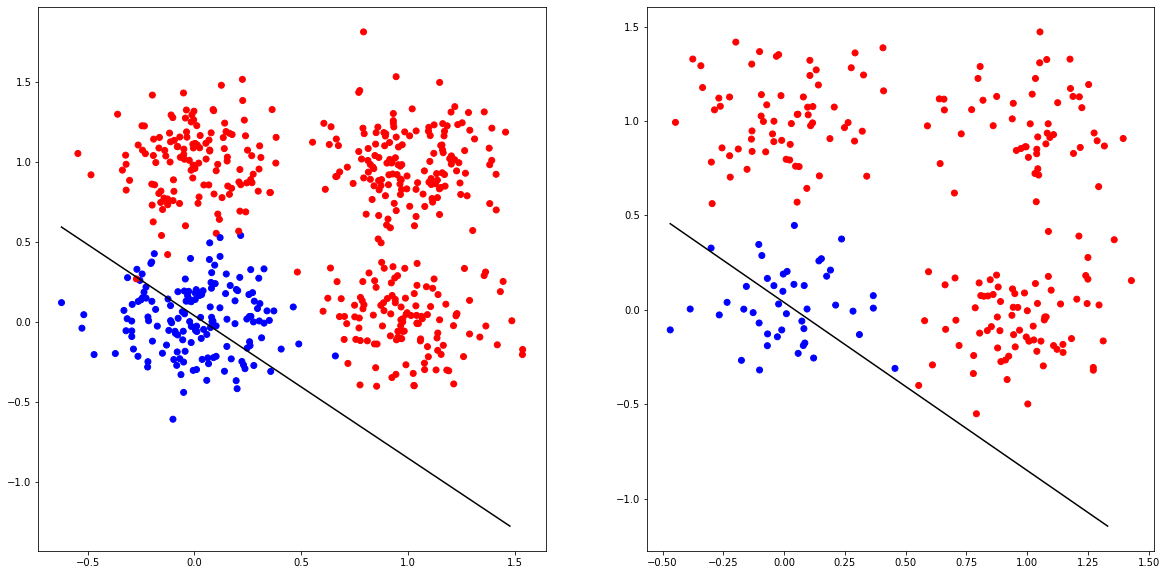

In [27]:
# Criando a lista de cores
cores = criar_cores(y_treino)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_treino[:,1])
maior = max(x_treino[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)


# Criação do gráfico
plt.rcParams['figure.figsize']=(20, 10)
    
plt.subplot(1, 2, 1)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_treino[:,1], x_treino[:,2], marker='o',color=cores)


# Criando a lista de cores
cores = criar_cores(y_teste)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_teste[:,1])
maior = max(x_teste[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)
    

plt.subplot(1, 2, 2)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_teste[:,1], x_teste[:,2], marker='o',color=cores)
plt.show()